In [25]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.style as style
import seaborn as sns
style.use('seaborn')
sns.set_style(style='darkgrid')
import numpy as np
import pandas as pd
from scipy import spatial
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import gensim 
import gensim.downloader as api
from gensim.models import Word2Vec 
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from MulticoreTSNE import MulticoreTSNE as MultiTSNE
import timeit
import pickle
import warnings
warnings.filterwarnings('ignore')

In [26]:
with open('data/tsne_matrix_10000_perplex_50.pkl', 'rb') as f:
    X = pickle.load(f)

In [27]:
subreddits = pd.read_csv('data/allsubreddits_10000.csv')
comments = subreddits['body']
subreddits = subreddits['subreddit']

2.4642869464335186 minutes
2.5724410364833603 minutes
2.5967331634831985 minutes
2.718407850816584 minutes
3.2158166990166746 minutes
3.319858624166712 minutes


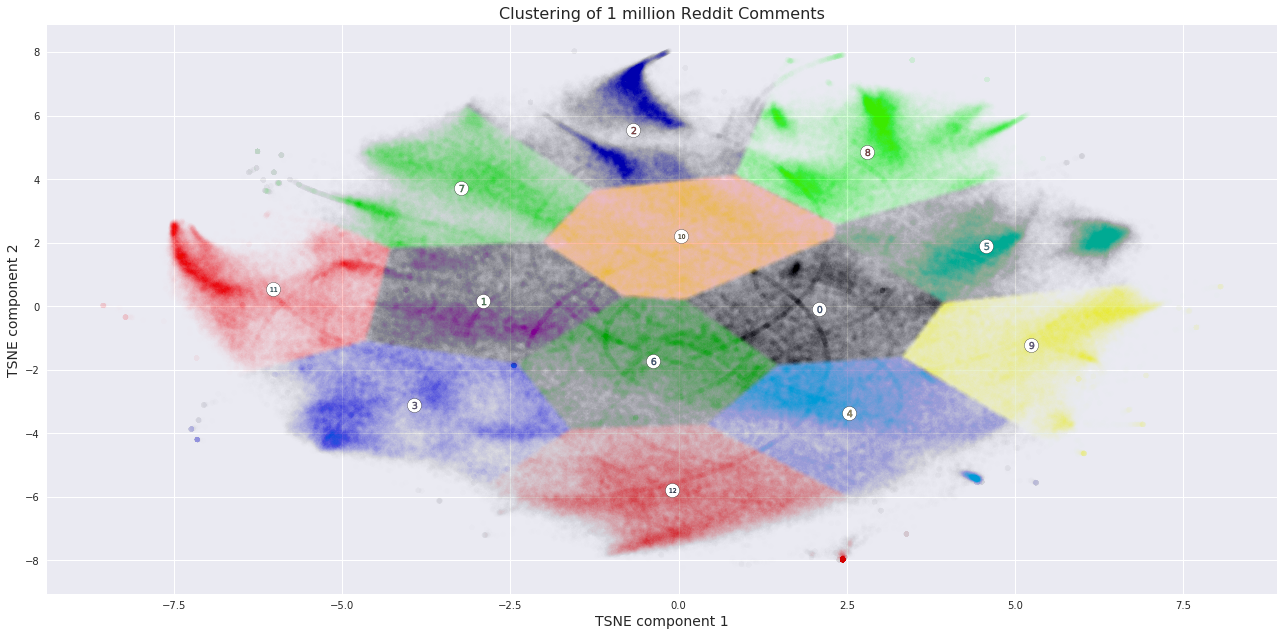

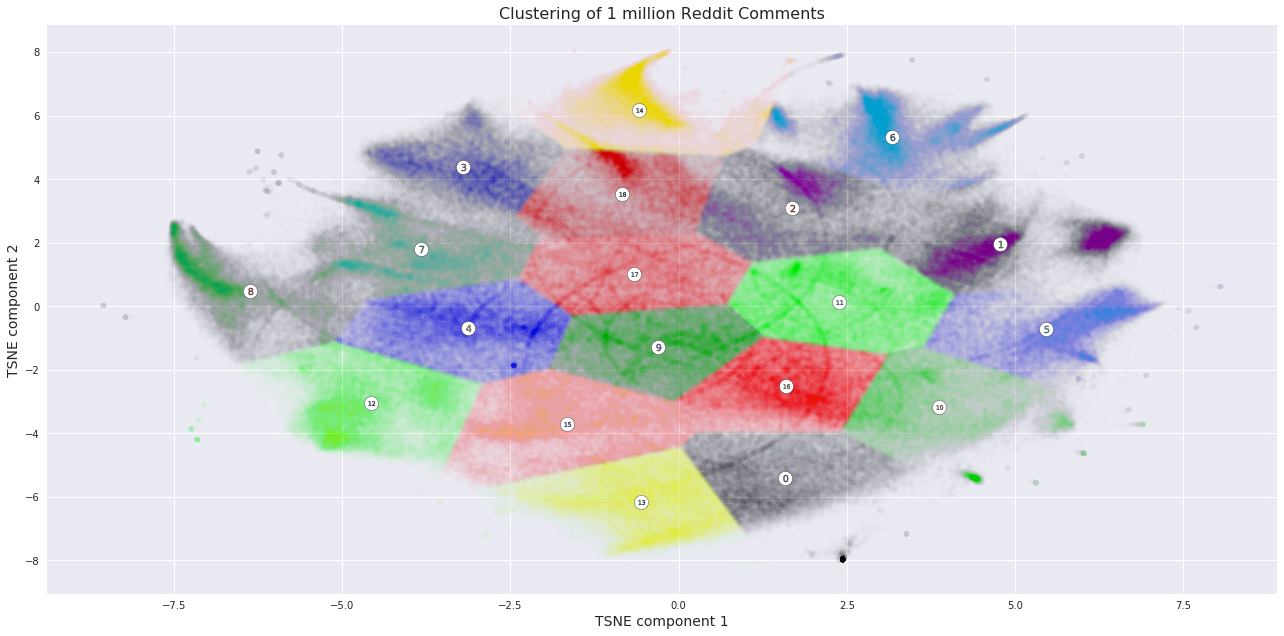

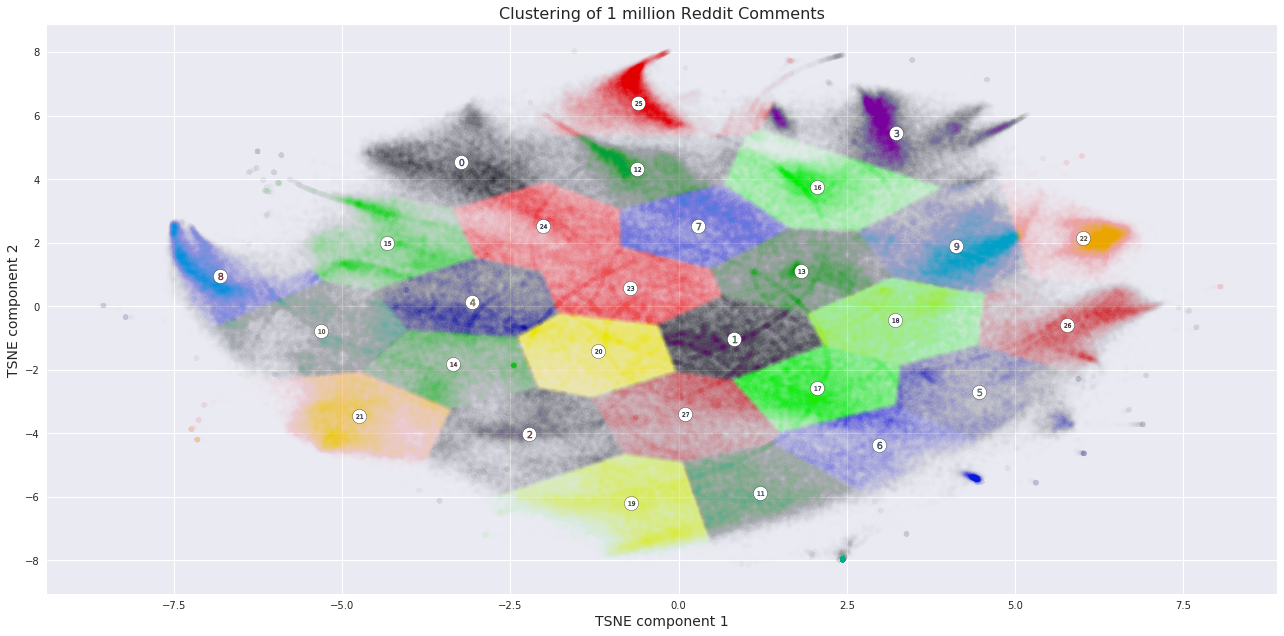

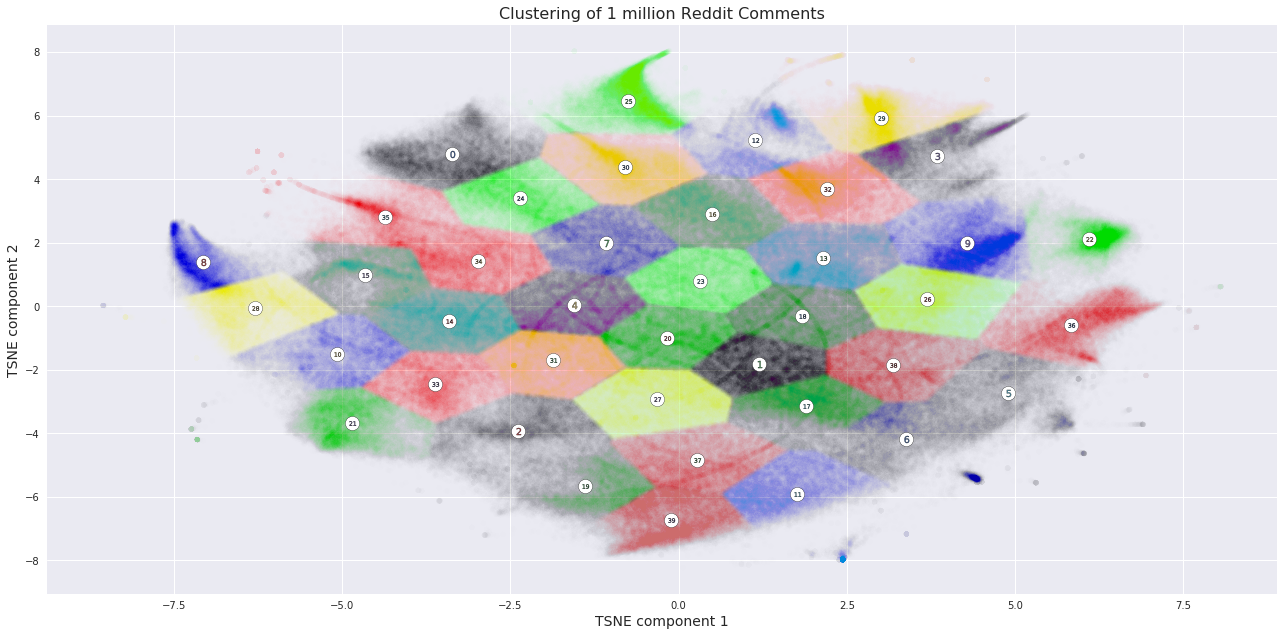

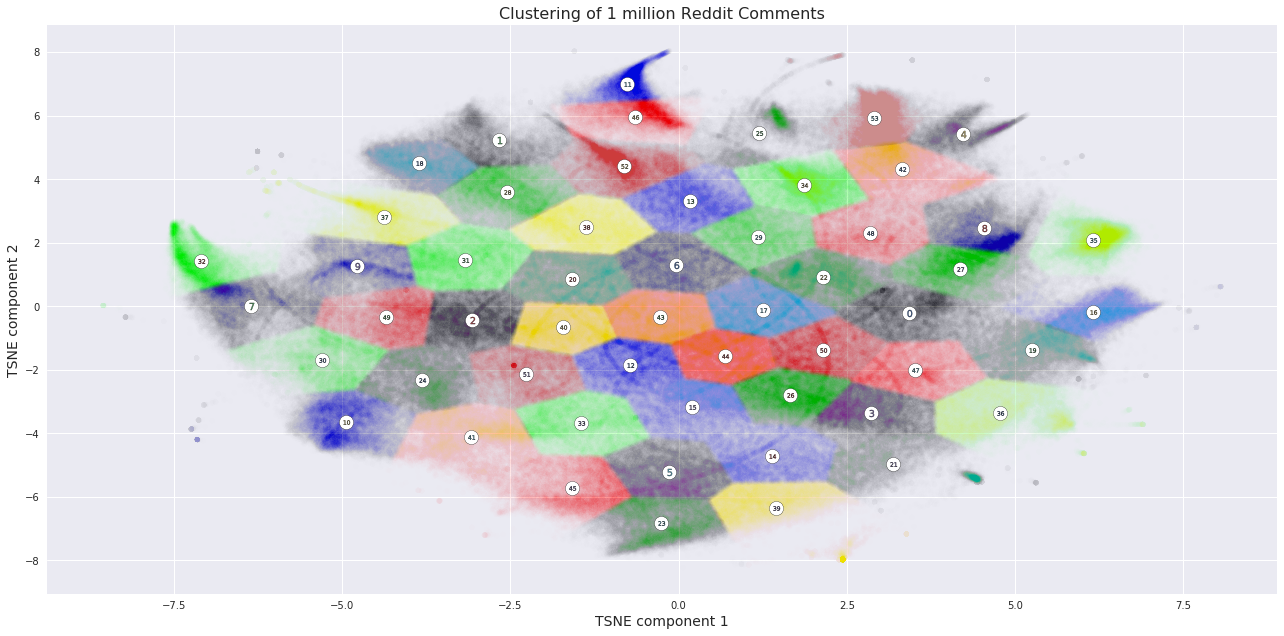

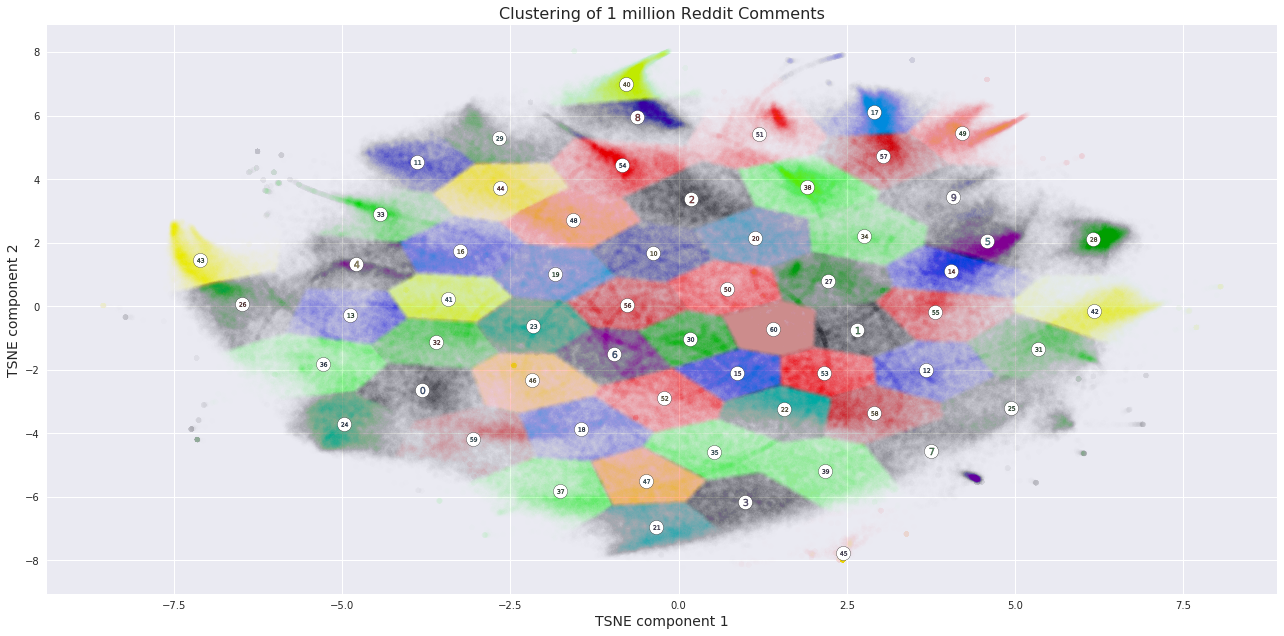

In [4]:
matplotlib.rcParams.update({'font.size': 12})
for n_clusters in [13,19,28,40,54,61]:
    start_time = timeit.default_timer()
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 9)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, verbose=1, n_jobs=-1, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.002, s=35,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax.set_title('Clustering of 1 million Reddit Comments', {'fontsize': 16})
    ax.set_xlabel('TSNE component 1', {'fontsize': 14})
    ax.set_ylabel('TSNE component 2', {'fontsize': 14})
    
    plt.tight_layout()
    fig.savefig('plots/kmeanstotal'+str(n_clusters)+'.png', dpi=640)
    print((timeit.default_timer() - start_time)/60,'minutes')

In [5]:
kmeans = KMeans(n_clusters=61, verbose=1, n_jobs=-1, random_state=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=61, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=1)

In [36]:
start_time = timeit.default_timer()
indexes=[]
for i in range(kmeans.cluster_centers_.shape[0]):
    distance, index = spatial.KDTree(X).query(kmeans.cluster_centers_[i],10)
    indexes.append(index)
print((timeit.default_timer() - start_time)/60,'minutes')

5.277326188300019 minutes


In [101]:
comments[indexes[27]].values

array(["Consider that the Daily Mail supported Hitler up to 1939 and maybe you'll see the angle they're coming from.",
       "If you think that subreddit isn't going to tank, you've got another thing coming.\n\n  \n\n\nI caught an admin on an anti-bot subreddit telling those randoms that were creating software to defeat bots, how their software would never work.\n\n  \n\n\nI caught this JUST AFTER I found them to be pushing advertised content on HQGs. I then got banned from those subreddits.\n\n  \n\n\n\nMaybe send them a letter, include this image?\n\n  \n\n\n\n  \n\n\nSay something like: I've been using this website for + years and I've even paid for 'gold'\n\n  \n\n\n  \n\n\n  \n\n\nI've seen that you've been censoring comments and uploaded content now for 4. Can I beg you don't destroy our one open forum where we can talk to eachother with ease, globally, just so you get a bigger paycheck?\n\n  \n\n\n  \n\n\n  \n\n\nJust so Serena Williams gets a bigger diamond?\n\n  \n\n\n  \n\n\